**1 Importing the required libraries and reading the data**

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("laptopPricenew.csv")
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


**2 Initial data exploration**

In [117]:
data.isnull().sum() #checks fo rmissing values in data set

,0
brand,0
processor_brand,0
processor_name,0
processor_gnrtn,0
ram_gb,0
ram_type,0
ssd,0
hdd,0
os,0
os_bit,0


no missing values


In [118]:
data.duplicated().sum() #checks and counts for duplicate values in data set

21

21 duplicated rows

In [119]:
data.drop_duplicates(inplace=True) #removes duplicate rows from dataset in the data itself without making a copy

In [120]:
data.describe(include='all') #gives summary of all statistics

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
count,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802,802.000000,802,802.00000,802.000000
unique,8,3,11,8,4,6,7,4,3,2,5,3,4,2,2,NaN,5,NaN,NaN
top,ASUS,Intel,Core i5,11th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,NaN,4 stars,NaN,NaN
freq,243,594,284,328,404,690,389,602,763,693,557,509,498,706,522,NaN,437,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76625.543641,NaN,299.84414,36.089776
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45232.984422,NaN,1001.78442,118.313553
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16990.000000,NaN,0.00000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45990.000000,NaN,0.00000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63990.000000,NaN,17.00000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89525.000000,NaN,140.25000,18.000000


In [121]:
data.shape

(802, 19)

In [122]:
#remove outlier
for i in data.columns:
  if data[i].dtype=='int' or data[i].dtype=='float': #calculates 99th percentile value and and saves only that are less
    q=data[i].quantile(0.99)
    data=data[data[i]<q]

In [123]:
#after outlier
print("After removing outliers, our dataset has {} rows.".format(data.shape[0]))

After removing outliers, our dataset has 777 rows.


**EDA**
*  Distributions and correlation across all numerical columns


<Figure size 640x480 with 0 Axes>

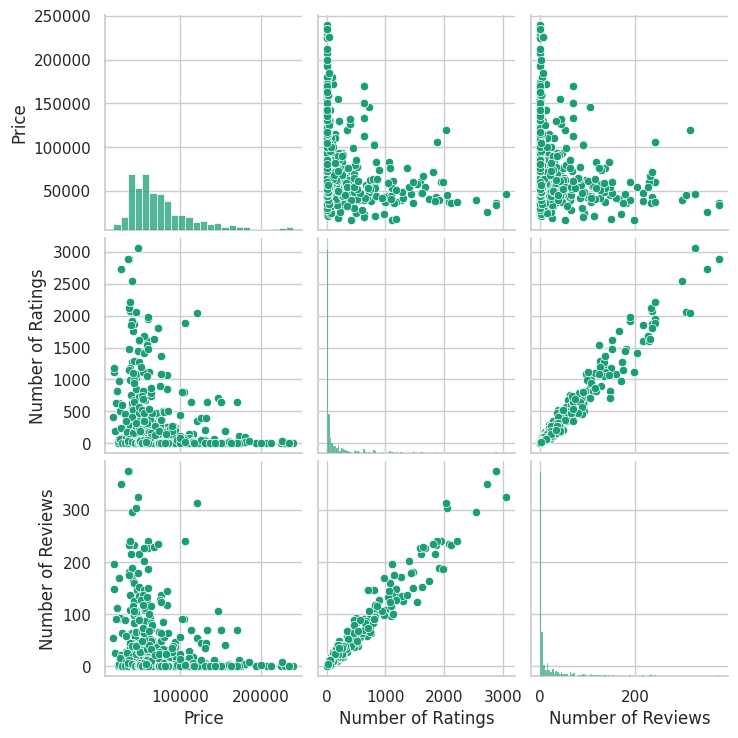

In [124]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette("Dark2")
sns.despine()

sns.pairplot(data);

Number of ratings and number of reviws have strong correlation

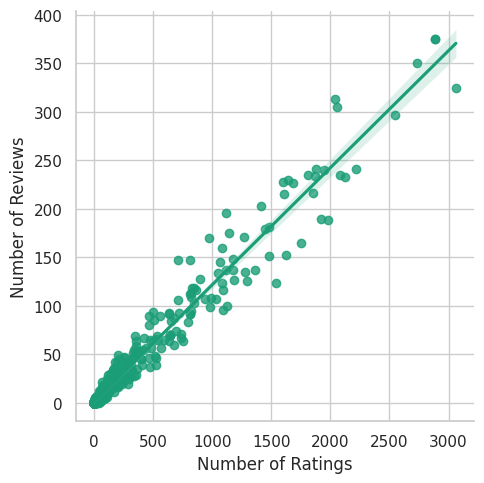

In [125]:
# Regression line for correlated columns
sns.lmplot(x='Number of Ratings',y='Number of Reviews',data=data);

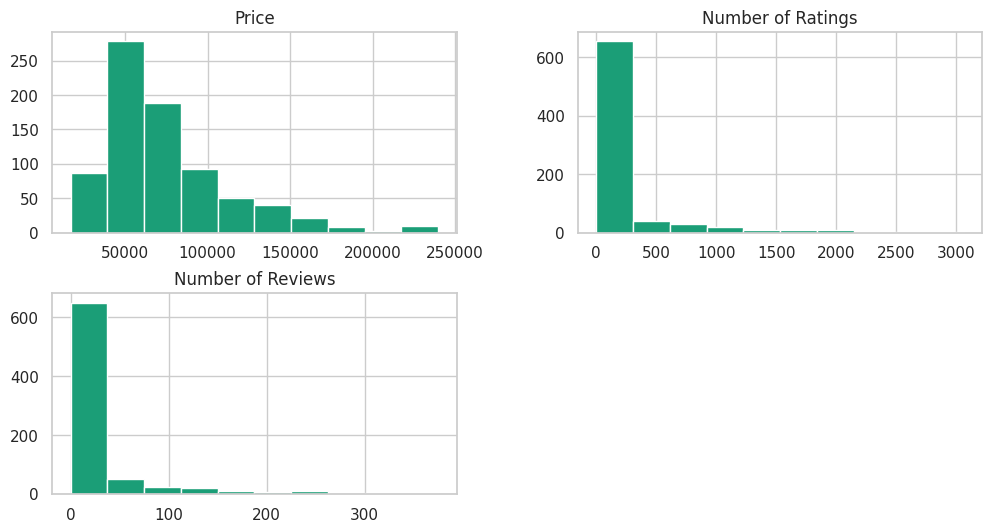

In [126]:
# Distribution of numerical columns
numerical_columns = ['Price', 'Number of Ratings', 'Number of Reviews']
data[numerical_columns].hist(figsize=(12, 6));

data visualization




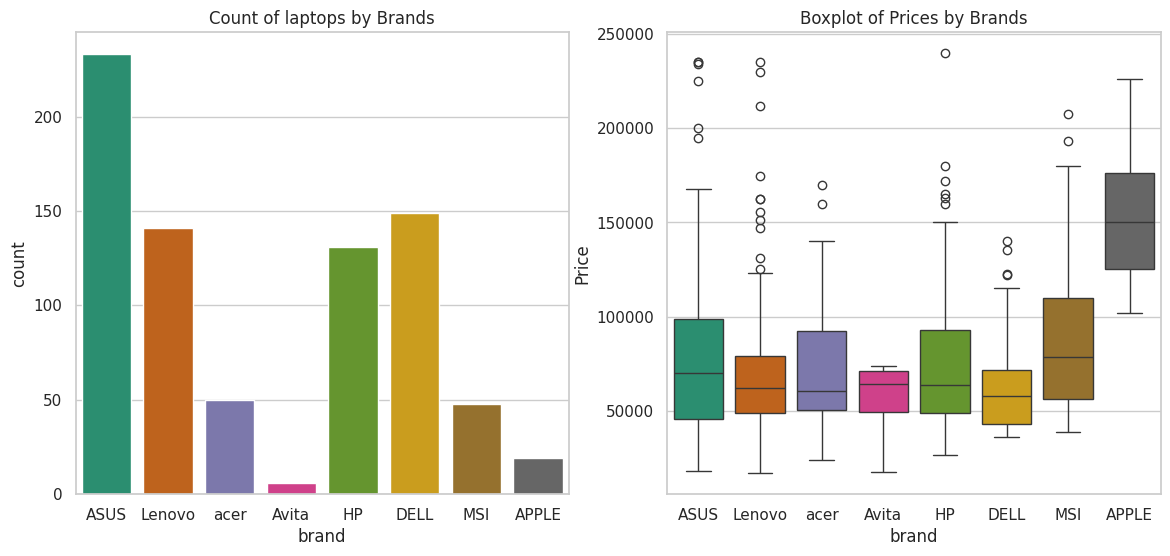

In [127]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=data.brand , hue=data.brand)
axes[0].set_title("Count of laptops by Brands")

sns.boxplot(ax=axes[1], x=data.brand, y=data.Price , hue=data.brand)
axes[1].set_title("Boxplot of Prices by Brands");

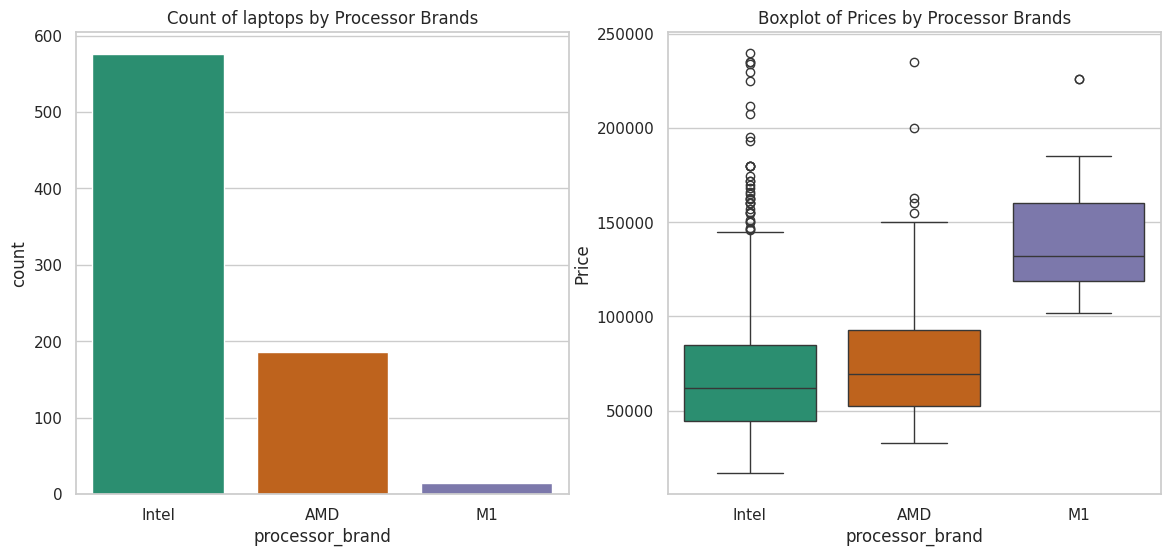

In [128]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=data.processor_brand , hue=data.processor_brand )
axes[0].set_title("Count of laptops by Processor Brands")

sns.boxplot(ax=axes[1], x=data.processor_brand, y=data.Price, hue=data.processor_brand )
axes[1].set_title("Boxplot of Prices by Processor Brands");

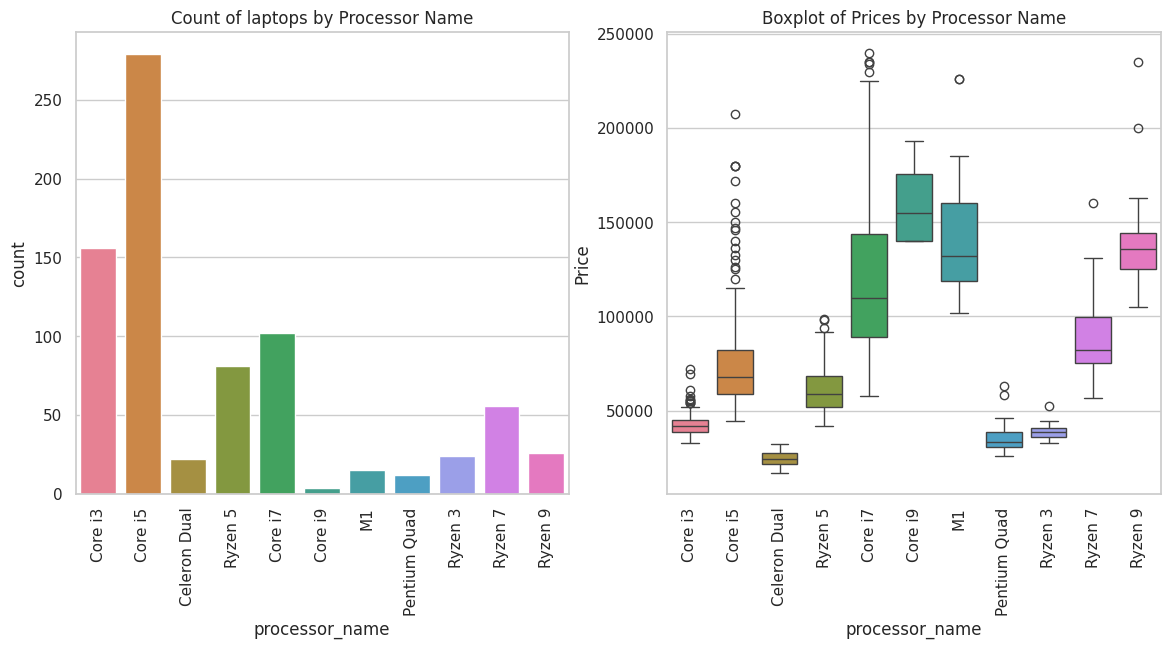

In [129]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=data.processor_name , hue=data.processor_name)
axes[0].set_title("Count of laptops by Processor Name")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[1], x=data.processor_name, y=data.Price , hue=data.processor_name)
axes[1].set_title("Boxplot of Prices by Processor Name")
axes[1].tick_params(axis='x', rotation=90);

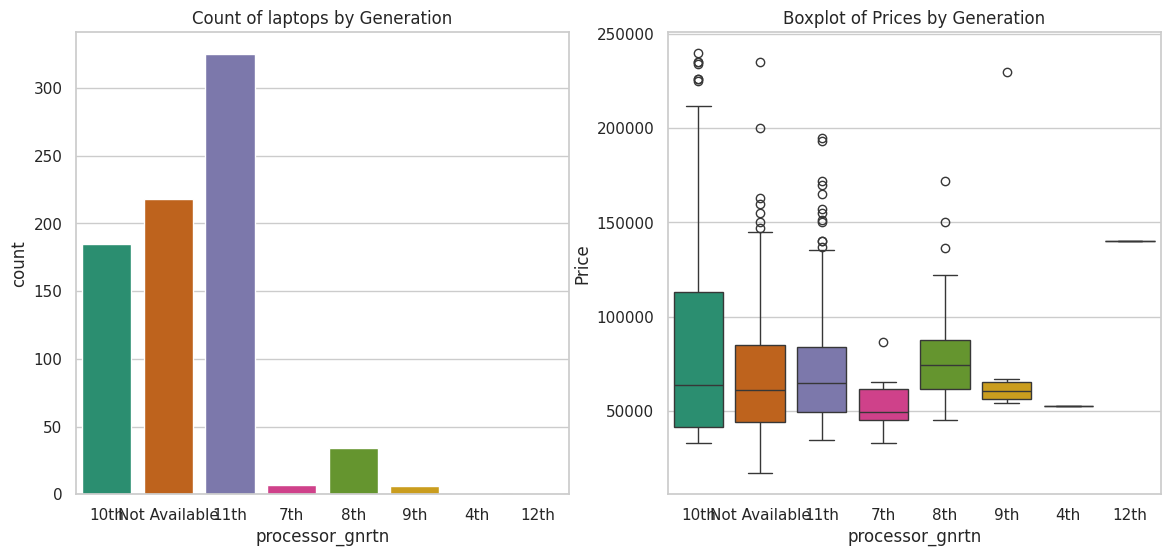

In [130]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=data.processor_gnrtn , hue=data.processor_gnrtn)
axes[0].set_title("Count of laptops by Generation")

sns.boxplot(ax=axes[1], x=data.processor_gnrtn, y=data.Price ,hue=data.processor_gnrtn)
axes[1].set_title("Boxplot of Prices by Generation");

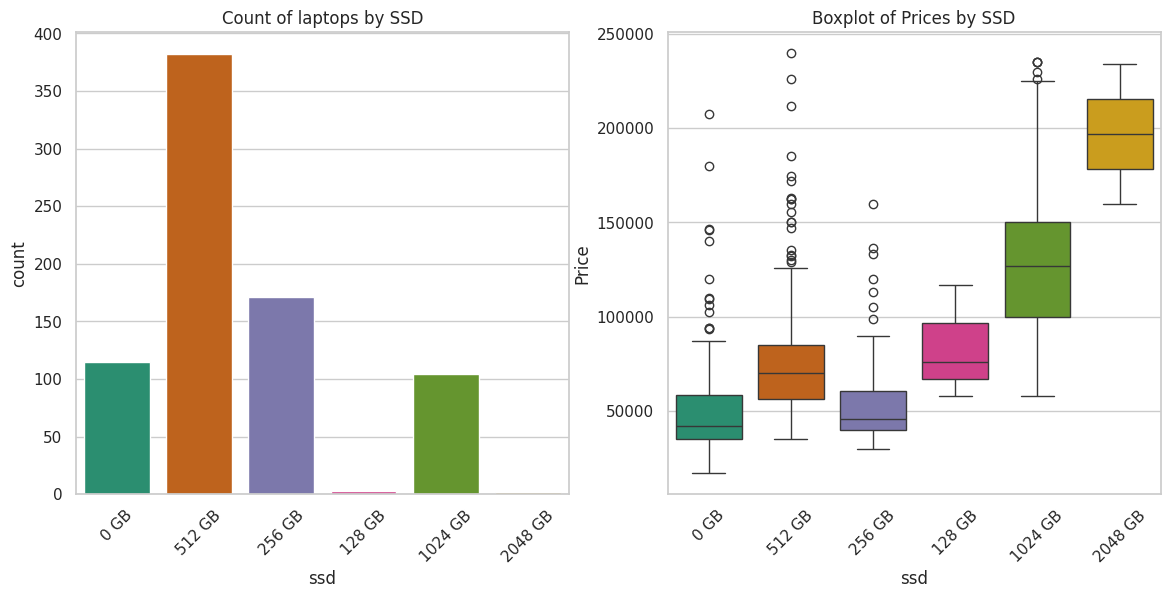

In [131]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=data.ssd , hue=data.ssd)
axes[0].set_title("Count of laptops by SSD")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], x=data.ssd, y=data.Price , hue=data.ssd)
axes[1].set_title("Boxplot of Prices by SSD")
axes[1].tick_params(axis='x', rotation=45);

Text(0.5, 1.0, 'Boxplot of Prices by OS')

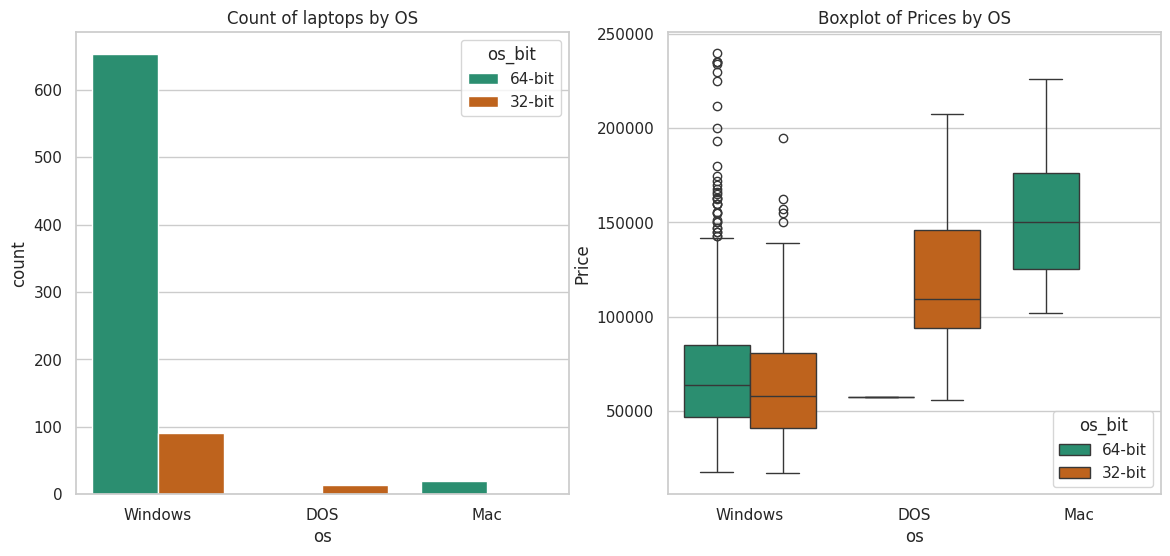

In [132]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=data.os, hue=data.os_bit)
axes[0].set_title("Count of laptops by OS")

sns.boxplot(ax=axes[1], x=data.os, y=data.Price, hue=data.os_bit)
axes[1].set_title("Boxplot of Prices by OS")

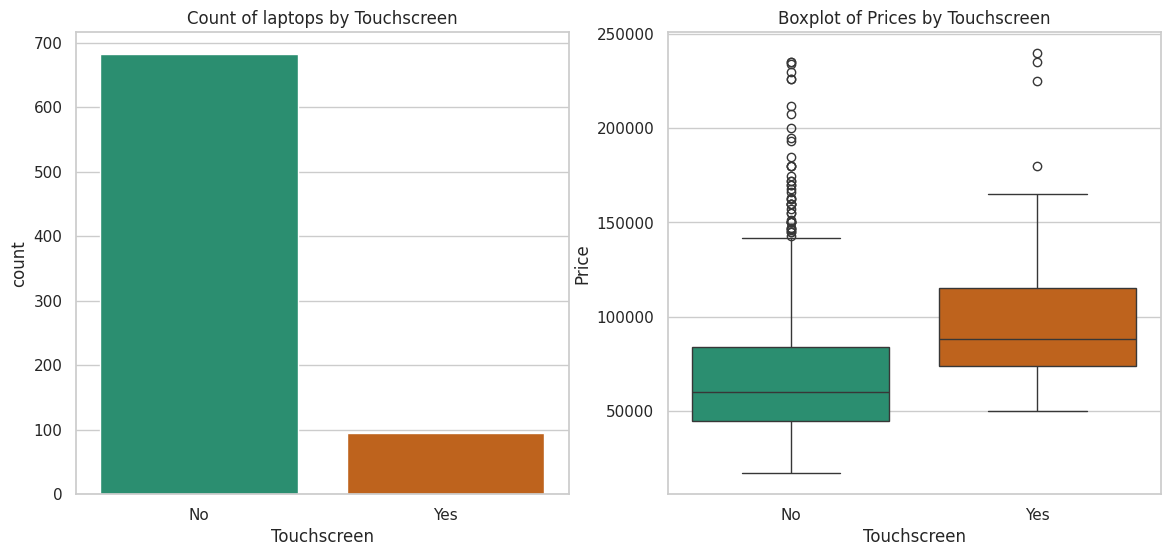

In [133]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=data.Touchscreen, hue=data.Touchscreen)
axes[0].set_title("Count of laptops by Touchscreen")

sns.boxplot(ax=axes[1], x=data.Touchscreen, y=data.Price , hue=data.Touchscreen)
axes[1].set_title("Boxplot of Prices by Touchscreen");

In [134]:
data[data['ssd'] == '128 GB']

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
205,HP,Intel,Core i5,8th,8 GB,DDR4,128 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,No,76012,4 stars,129,16
578,HP,Intel,Core i7,8th,16 GB,DDR4,128 GB,1024 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,116941,3 stars,0,0
624,ASUS,Intel,Pentium Quad,Not Available,4 GB,DDR4,128 GB,0 GB,Windows,32-bit,0 GB,Casual,No warranty,Yes,No,58100,3 stars,0,0


There are only 3 laptops with such SSD. They have very different prices, but RAM and processor seem to be correlated with them. So, let's keep these rows

**Data Preprocessing **

Standard scaling numeric  to ensure all features have the same scale

In [135]:
#scaling numeric columns
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
for i in data.columns:
  if data[i].dtype=='int' or data[i].dtype=='float':
    data[i]=scale.fit_transform(data[i].values.reshape(-1,1))

this code converts categorical variables into a numerical format using one-hot encoding

In [136]:
#one hot encoding
categorical_variables = data.columns[data.dtypes == 'object']
data_trans = pd.get_dummies(data, columns=categorical_variables, drop_first=True)

In [137]:
data_trans.head()


,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,-1.033642,-0.429883,-0.439817,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,-0.921224,-0.285748,-0.345336,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,-0.895381,-0.418260,-0.420921,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,-0.120318,-0.436858,-0.439817,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,-1.231575,-0.436858,-0.439817,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


Train / Test Split

1.   Set a variable X equal to all the numerical features of the laptops and a variable y equal to the "Price" column which we want to predict



In [138]:
y=data_trans['Price']
x=data_trans.drop('Price',axis=1) #x will now contain all the columns except Price.

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101) #30% for testing and 70% for trainig
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((543, 62), (234, 62), (543,), (234,))

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test) #prdicts the value of y for unseen data

**Evaulating the model**

In [141]:
#calculating metrices
r2=r2_score(y_test,y_pred)
r2_test=r2_score(y_train,model.predict(x_train))
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [142]:
#printing
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"Adjusted R² Score: {adjusted_r2}")
print(f"R² Score (Training Set): {r2_test}")

MAE: 0.25953755583530613
MSE: 0.14542574204739744
RMSE: 0.38134727224328935
R² Score: 0.8307190685929425
Adjusted R² Score: 0.7693423566207931
R² Score (Training Set): 0.8194357309397863


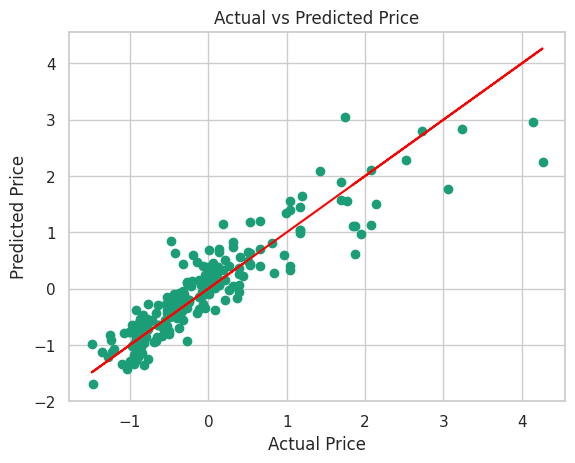

In [143]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()